In [3]:
# Loading libraries
import pandas as pd



# Question-1

In [46]:
# Reading the data
df=pd.read_csv(r"C:\Users\pavan\Downloads\data_science_jobs_indeed_usa.csv\data_science_jobs_indeed_usa.csv")

In [5]:
df.head()

,Unnamed: 0,Title,Company,Location,Rating,Date,Salary,Description,Links,Descriptions
0,0,Data Scientist,Driven Brands,"Benicia, CA",2.4,PostedPosted 26 days ago,NaN,You’ll be working alongside a team of eight an...,https://www.indeed.com/rc/clk?jk=74d176d595225...,We invite you to join us at Driven Brands!\nHe...
1,1,Business Analyst,Sabot Consulting,Remote,NaN,PostedPosted 4 days ago,$80 - $120 an hour,Preferred candidates will have prior experienc...,https://www.indeed.com/rc/clk?jk=f662b2efb509b...,Sabot Consulting (Sabot) is a management consu...
2,2,IT Business Intelligence Developer (FT) Remote...,Ballad Health,"Remote in Blountville, TN",3.0,PostedPosted 30+ days ago,NaN,Job Details Apply Save Print this job Email a…,https://www.indeed.com/rc/clk?jk=58612836c63b8...,Job Details\nApply\nSave\nPrint this job\nEmai...
3,3,Data Engineer,Longevity Holdings Inc.,"Remote in Minneapolis-Saint Paul, MN",NaN,PostedPosted 3 days ago,"$90,000 - $110,000 a year",Incorporate core data management competencies ...,https://www.indeed.com/company/TwentyFirst/job...,Position: Data Engineer\nLocation: MN\nAs a Da...
4,4,Network Administrator/dba developer,WKI Kenworth,"Wichita, KS 67219",NaN,EmployerActive 2 days ago,"$50,000 - $70,000 a year",The Network Administrator provides 2nd level e...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Full Job Description\nThe Network Administrato...


In [43]:
# importing nltk library from that stopwords
import nltk 
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)


{'herself', 'between', 'it', 's', 'ain', 'and', "you're", 'should', "you'll", 'isn', 'about', 'or', 'nor', 'theirs', 'having', 'mightn', 'to', 'those', 'wouldn', "should've", "wouldn't", 'is', 'up', 're', 'shouldn', 'd', 'ourselves', 'all', 'too', "you'd", 'your', 'most', 'further', 'm', 'she', 'am', 'there', 'itself', 'on', 'himself', "don't", 'weren', 'my', 'so', "haven't", 'will', 'has', 'his', 'the', 'off', 'be', 'by', 'themselves', 'below', 'once', 'which', "shan't", "that'll", 'both', 'from', 'what', 'been', 'him', 'no', 'under', 'with', 'why', "didn't", "needn't", 'do', 'through', 'aren', 'its', "mustn't", 'didn', 'these', 'couldn', 'doing', 'being', 'hers', 'mustn', 'me', 'our', 'here', 't', 'them', 'in', "couldn't", 'but', "weren't", "she's", 'down', 'a', 'needn', 'very', 'i', 'shan', "shouldn't", 'just', 'then', 'yours', 'out', 'than', "you've", 'more', 'not', 'while', 'yourself', 'haven', "hadn't", 'that', 'against', 'few', 'now', 'were', 'if', 'we', 'whom', 'during', 'same'

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pavan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
import regex as re

# using regex removing stop words

def remove_stop(text):
    '''   cleaning the text     '''
    # Replace special characters with spaces
    text = re.sub(r"[,.\"\'!@#$%^&*(){}?/;`~:<>+=-\\\n]", " ", text)
    tokens = text.split()  # Split the text into tokens
    filtered_tokens = [token.lower() for token in tokens if token.lower() not in stopwords]
    # Join the filtered tokens back into a string
    return filtered_tokens

pipeline = [remove_stop]

def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens

df['tokens'] = df['Descriptions'].apply(prepare, pipeline=pipeline)



In [11]:
df['tokens']

0       [e, invite, join, us, riven, rands, eadquarter...
1       [abot, onsulting, abot, management, consulting...
2         [ob, etails, pply, ave, rint, job, mail, riend]
3       [osition, ata, ngineer, ocation, ata, ngineer,...
4       [ull, ob, escription, etwork, dministrator, pr...
                              ...                        
1195    [ompany, escription, yperscience, transforming...
1196    [ob, itle, -, ata, cientist, osition, -, 2, mp...
1197    [ata, ngineer, ower, ocation, emote, ased, ara...
1198    [n, role, opportunity, major, impact, value, c...
1199    [osition, usiness, nalyst, ocation, emote, ura...
Name: tokens, Length: 1200, dtype: object

In [12]:
# Statistical description of data
df.describe(include='O')

,Title,Company,Location,Date,Salary,Description,Links,Descriptions,tokens
count,1200,1200,1200,1200,582,1200,1200,1200,1200
unique,566,883,584,46,381,1016,1080,1030,1030
top,Data Engineer,Artech Consulting LLC,Remote,PostedPosted 30+ days ago,$60 - $65 an hour,"Experience with data science, data engineering...",https://www.indeed.com/company/PolyCon-Solutio...,Note: This is a fully remote role for the righ...,"[ote, fully, remote, role, right, candidate, e..."
freq,93,10,283,390,12,9,3,10,10


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

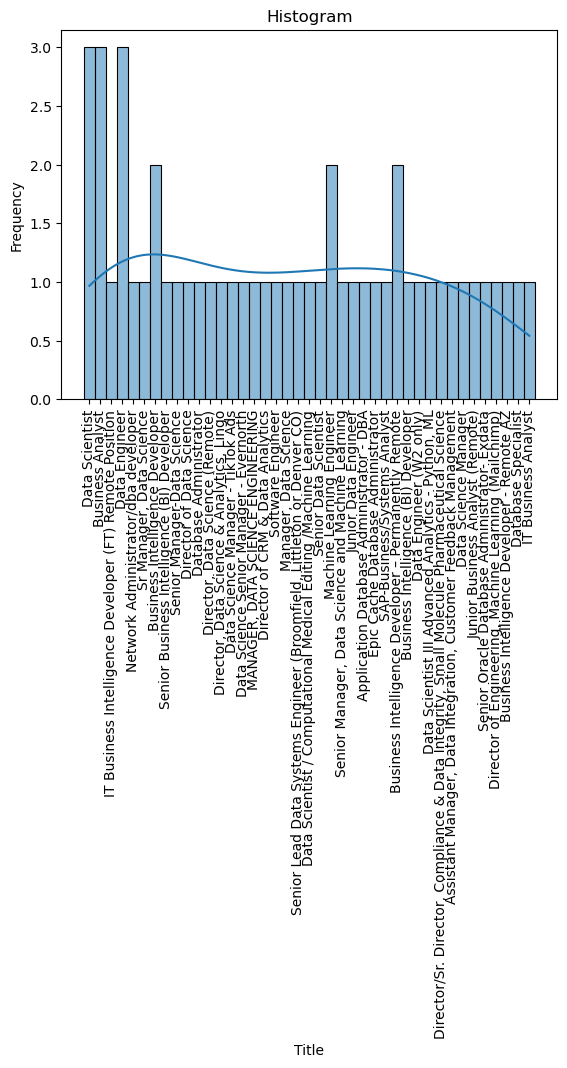

In [22]:
# Create a histogram
sns.histplot(df['Title'].head(50), kde=True)
plt.title('Histogram')
plt.xlabel('Title')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels by 45 degrees
plt.show()


In [19]:
# Counting the frequency of the tokens and Assuming df is already defined
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)


,freq
token,
data,7505
experience,3878
business,3333
xperience,2898
e,2855
team,2835
work,2632
ata,2439
years,2108


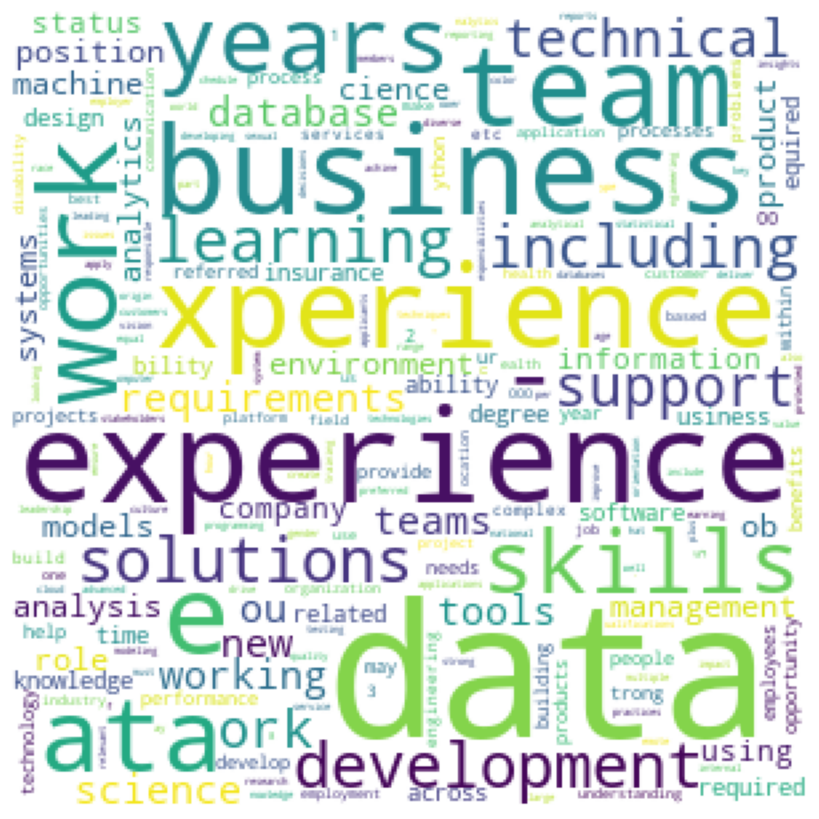

In [20]:
## displays a word cloud visualization from a DataFrame of word frequencies using the WordCloud library and Matplotlib.
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [47]:
# Cleaning the text by performing tokenization, removing the stopwords and preprocessing the text.
import regex as re

def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens
df['token1'] = df['Descriptions'].apply(prepare, pipeline=pipeline)


In [29]:
a=['minukuripavani08@gmail.com', '(123) 456-7890','/home/user/data/file.txt','https://www.example.com/page.html','#DataScience #MachineLearning #AI']

# Email regex
regex = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'
result = re.match(regex,a[0])
print(result.group())


regex = r'\(?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4}'
result = re.match(regex, a[1])
print(result.group())




regex = r'\/(?:[^\/\n]+\/)*([^\/\n]+\.[^\/\n]+)'
result = re.match(regex, a[2])
print(result.group(1))

regex = r'^(https?:\/\/)?(?:www\.)?([^\/\n]+)(\/.*)?$'
result = re.match(regex, a[3])
print("Protocol:", result.group(1))
print("Domain:", result.group(2))
print("Path:", result.group(3))



regex = r'#\w+'
result = re.findall(regex, a[4])
print(result)


minukuripavani08@gmail.com
(123) 456-7890
file.txt
Protocol: https://
Domain: example.com
Path: /page.html
['#DataScience', '#MachineLearning', '#AI']


# sentiment analysis

In [35]:
from textblob import TextBlob

In [48]:
# Create a function to get the subjectivity
def getSubjectivity(tokens):
    text = ' '.join(tokens)  # Convert list of tokens to a single string
    return TextBlob(text).sentiment.subjectivity

# Create a function to get polarity
def getPolarity(tokens):
    text = ' '.join(tokens)  # Convert list of tokens to a single string
    return TextBlob(text).sentiment.polarity

# Now we create new columns for subjectivity and polarity and add them to the DataFrame
df['Subjectivity'] = df['token1'].apply(getSubjectivity)
df['Polarity'] = df['token1'].apply(getPolarity)

# Display the DataFrame
df.head()


,Unnamed: 0,Title,Company,Location,Rating,Date,Salary,Description,Links,Descriptions,token1,Subjectivity,Polarity
0,0,Data Scientist,Driven Brands,"Benicia, CA",2.4,PostedPosted 26 days ago,NaN,You’ll be working alongside a team of eight an...,https://www.indeed.com/rc/clk?jk=74d176d595225...,We invite you to join us at Driven Brands!\nHe...,"[invite, join, us, driven, brands, headquarter...",0.487929,0.240048
1,1,Business Analyst,Sabot Consulting,Remote,NaN,PostedPosted 4 days ago,$80 - $120 an hour,Preferred candidates will have prior experienc...,https://www.indeed.com/rc/clk?jk=f662b2efb509b...,Sabot Consulting (Sabot) is a management consu...,"[sabot, consulting, sabot, management, consult...",0.216667,0.054762
2,2,IT Business Intelligence Developer (FT) Remote...,Ballad Health,"Remote in Blountville, TN",3.0,PostedPosted 30+ days ago,NaN,Job Details Apply Save Print this job Email a…,https://www.indeed.com/rc/clk?jk=58612836c63b8...,Job Details\nApply\nSave\nPrint this job\nEmai...,"[job, details, apply, save, print, job, email,...",0.000000,0.000000
3,3,Data Engineer,Longevity Holdings Inc.,"Remote in Minneapolis-Saint Paul, MN",NaN,PostedPosted 3 days ago,"$90,000 - $110,000 a year",Incorporate core data management competencies ...,https://www.indeed.com/company/TwentyFirst/job...,Position: Data Engineer\nLocation: MN\nAs a Da...,"[position, data, engineer, location, mn, data,...",0.454656,0.237190
4,4,Network Administrator/dba developer,WKI Kenworth,"Wichita, KS 67219",NaN,EmployerActive 2 days ago,"$50,000 - $70,000 a year",The Network Administrator provides 2nd level e...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Full Job Description\nThe Network Administrato...,"[full, job, description, network, administrato...",0.293712,0.072891
